In [1]:
###################################################################################################
############################################# MODULES #############################################
###################################################################################################
from typing import IO
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random

In [2]:
###################################################################################################
########################################### DATAS IMPORT ##########################################
###################################################################################################
with open('Datasets/Dataset_1_test.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_test = data[:, 0]
    y1_test = data[:, 1]

with open('Datasets/Dataset_1_train.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_train = data[:, 0]
    X1_train / np.linalg.norm(X1_train)
    y1_train = data[:, 1]

with open('Datasets/Dataset_1_valid.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_valid = data[:, 0]
    X1_valid / np.linalg.norm(X1_valid)
    y1_valid = data[:, 1]

with open('Datasets/Dataset_2_test.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_test = data[:, 0]
    X2_test / np.linalg.norm(X2_test)
    y2_test = data[:, 1]

with open('Datasets/Dataset_2_train.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_train = data[:, 0]
    X2_train / np.linalg.norm(X1_train)
    y2_train = data[:, 1]

with open('Datasets/Dataset_2_valid.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_valid = data[:, 0]
    X2_valid / np.linalg.norm(X1_valid)
    y2_valid = data[:, 1]

In [3]:
names = pd.read_csv('Datasets/attributes.csv', delim_whitespace=True)
data = pd.read_csv('Datasets/communities.data', names=names['names']).replace('?', np.NaN)

In [4]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [5]:
data.shape

(1994, 128)

In [6]:
###################################################################################################
########################################## DATA SELECTION #########################################
###################################################################################################
data = data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)
data = data.astype('float')
missing_features = data.columns[data.isnull().any()]

for col in missing_features:
    data[col].fillna(value=data[col].mean(), inplace=True)

In [7]:
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [8]:
data.shape

(1994, 123)

In [9]:
#########################################################################################################
############################################ FUNCTIONS EXO 1 ############################################
#########################################################################################################
class PolyReg20:
    def __init__(self, epochs=50, l2=0):
        self.w = np.zeros(21)
        self.epochs = epochs
        self.l2 = l2

    def transform(self, X):
        vandermonde = np.ones((50, 1))
        for j in range(1, 21):
            x_pow = np.power(X, j)
            vandermonde = np.append(vandermonde, x_pow.reshape(-1, 1), axis=1)
        return vandermonde

    def predict(self, X):
        return self.transform(X) @ self.w

    def fit(self, X, y):
        vandermonde = self.transform(X)
        for i in range(self.epochs):
            y_pred = self.predict(X)
            self.w = self.w - ((vandermonde.T @ (y_pred - y)) + (self.l2 * self.w))/50

In [10]:
def MSE(y_pred, y):
    return np.square(y_pred - y).mean()

In [11]:
#########################################################################################################
############################################ FUNCTIONS EXO 2 ############################################
#########################################################################################################
class LinearReg:
    def __init__(self, epochs=20, learning_rate=1e-6, X_valid=[], y_valid=[]):
        #y = a*x + b
        self.a = 0
        self.b = 0
        self.epochs = epochs
        self.lr = learning_rate
        self.MSE_global = list()
        self.X_valid = X_valid
        self.y_valid = y_valid

    def predict(self, X):
        return self.a*X + self.b

    def MSE(self, y_pred, y):
        return np.square(y_pred - y).mean()

    def SGD(self, X, y):
        MSE_tmp = list()
        for epoch in range(self.epochs):
            y_pred = self.predict(X)

            error = y_pred - y

            grad_a = X*error/self.N
            grad_b = error/self.N

            self.a = self.a - self.lr * grad_a
            self.b = self.b - self.lr * grad_b

            MSE = self.MSE(y_pred, y)
            MSE_tmp.append(MSE)
            #print(f'    Epoch: {epoch+1}/{self.epochs}, MSE={MSE}')

        self.MSE_global.append(MSE_tmp)

    def SGD_plt(self, X, y):
        MSE_tmp = list()
        for epoch in range(self.epochs):
            y_pred = self.predict(X)

            error = y_pred - y

            grad_a = X*error/self.N
            grad_b = error/self.N

            self.a = self.a - self.lr * grad_a
            self.b = self.b - self.lr * grad_b

            MSE = self.MSE(y_pred, y)
            MSE_tmp.append(MSE)

        self.MSE_global.append(MSE_tmp)

    def fit(self, X, y):
        self.N = len(X)
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD(Xi, yi)

    def fit_and_MSE_valid(self, X, y):
        self.N = len(X)
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD(Xi, yi)
            y_pred_valid = self.predict(self.X_valid)
            mse_valid = self.MSE(y_pred_valid, self.y_valid)
            print(
                f"MSE pour le jeu de validation après {i+1} données d'entrainement, 50 epochs par donnée et un pas de {self.lr} = {mse_valid}")

    def fit_and_plot_valid(self, X, y):
        self.N = len(X)
        figure_exo2_2, axis_exo2_2 = plt.subplots(3, 2)
        axis_exo2_2[0][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[0][1].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[1][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[1][1].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[2][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD_plt(Xi, yi)
            y_valid_pred = self.predict(self.X_valid)

            if i == 0:
                axis_exo2_2[0][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[0][0].legend()
                axis_exo2_2[0][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 75:
                axis_exo2_2[0][1].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[0][1].legend()
                axis_exo2_2[0][1].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 150:
                axis_exo2_2[1][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[1][0].legend()
                axis_exo2_2[1][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 225:
                axis_exo2_2[1][1].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[1][1].legend()
                axis_exo2_2[1][1].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 299:
                axis_exo2_2[2][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[2][0].legend()
                axis_exo2_2[2][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
        plt.show()

In [12]:
#########################################################################################################
################################################# EXO 1 #################################################
#########################################################################################################
model = PolyReg20()
model.fit(X1_train, y1_train)

y1_valid_pred = model.predict(X1_valid)
y1_train_pred = model.predict(X1_train)

MSE_valid = MSE(y1_valid_pred, y1_valid)
MSE_train = MSE(y1_train_pred, y1_train)

############################################### L2 ################################################
y1_valid_pred_L2s, y1_train_pred_L2s = [], []
MSE_valids, MSE_trains = [], []
N = 100
L2_factors = [i/N for i in range(N+1)]

for i in range(N+1):
    model = PolyReg20(l2=i/N)
    model.fit(X1_train, y1_train)

    y1_valid_pred_L2 = model.predict(X1_valid)
    y1_train_pred_L2 = model.predict(X1_train)

    y1_valid_pred_L2s.append(y1_valid_pred_L2)
    y1_train_pred_L2s.append(y1_train_pred_L2)

    MSE_valids.append(MSE(y1_valid_pred_L2, y1_valid))
    MSE_trains.append(MSE(y1_train_pred_L2, y1_train))

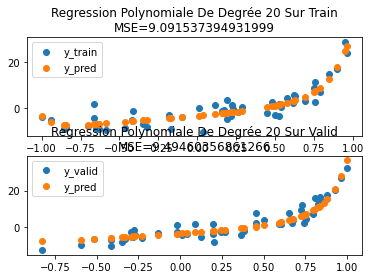

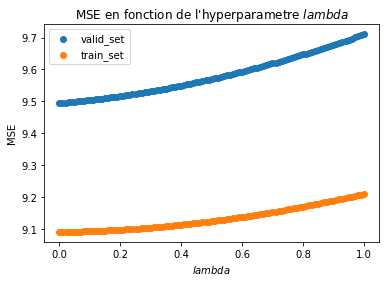

In [13]:
###################################################################################################
############################################# GRAPHS ##############################################
###################################################################################################
plt.rcParams['figure.figsize'] = [10, 5]

figure, axis = plt.subplots(2, 1)

axis[0].scatter(X1_train, y1_train, label='y_train')
axis[0].scatter(X1_train, y1_train_pred, label='y_pred')
axis[0].legend()
axis[0].set_title(
    f'Regression Polynomiale De Degrée 20 Sur Train\nMSE={MSE_train}')

axis[1].scatter(X1_valid, y1_valid, label='y_valid')
axis[1].scatter(X1_valid, y1_valid_pred, label='y_pred')
axis[1].legend()
axis[1].set_title(
    f'Regression Polynomiale De Degrée 20 Sur Valid\nMSE={MSE_valid}')
plt.show()

############################################### L2 ################################################
plt.scatter(L2_factors, MSE_valids, label='valid_set')
plt.scatter(L2_factors, MSE_trains, label='train_set')
plt.legend()
plt.title(f'MSE en fonction de l\'hyperparametre $lambda$')
plt.xlabel('$lambda$')
plt.ylabel('MSE')
plt.show()